## Communicate Data Findings Project 

### Dataset selected: Ford GoBike System Data
The dataset of 2019 bike share in California.

## Investigation Overview

> The main goal of this ivestigation is to find out the important features that had influence on the bike share dataset for the year of 2019.

## Dataset Overview

> The dataset is very large 2,506,983 rows, most of the data is qualitative and the way they were presented it was hard to get quality infomation, so I developed new columns with more useful information like season, month name and duration interval.

In [1]:
## Packages necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

%matplotlib inline

In [2]:
# Creating the dataframes
df_jan_19 = pd.read_csv('201901-fordgobike-tripdata.csv')
df_feb_19 = pd.read_csv('201902-fordgobike-tripdata.csv')
df_mar_19 = pd.read_csv('201903-fordgobike-tripdata.csv')
df_apr_19 = pd.read_csv('201904-fordgobike-tripdata.csv')
df_may_19 = pd.read_csv('201905-baywheels-tripdata.csv')
df_jun_19 = pd.read_csv('201906-baywheels-tripdata.csv')
df_jul_19 = pd.read_csv('201907-baywheels-tripdata.csv')
df_aug_19 = pd.read_csv('201908-baywheels-tripdata.csv')
df_sep_19 = pd.read_csv('201909-baywheels-tripdata.csv')
df_oct_19 = pd.read_csv('201910-baywheels-tripdata.csv')
df_nov_19 = pd.read_csv('201911-baywheels-tripdata.csv')
df_dec_19 = pd.read_csv('201912-baywheels-tripdata.csv')

C:\Users\Hugo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Hugo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Hugo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Merging the Dataframes
df_2019 = pd.concat([df_jan_19, df_feb_19, df_mar_19, df_apr_19, df_may_19, 
                   df_jun_19, df_jul_19, df_aug_19, df_sep_19, df_oct_19, df_nov_19, df_dec_19], ignore_index=True, sort=False)

In [4]:
#cleaning
df_2019.drop(columns=['start_station_name', 'start_station_id', 
                      'end_station_name', 'end_station_id', 'bike_share_for_all_trip', 'rental_access_method'], inplace=True)
df_2019.dropna(axis=0, inplace=True)

#converting columns to datetime
time_cols = ['start_time', 'end_time']

for i in time_cols:
    df_2019[i] = pd.to_datetime(df_2019[i])
    
# Creat month columns to help in the visualizations
import calendar
df_2019['start_month'] = (df_2019['start_time'].dt.month).apply(lambda x: calendar.month_abbr[x])
df_2019['end_month'] = (df_2019['end_time'].dt.month).apply(lambda x: calendar.month_abbr[x])

In [5]:
#functions

# Function to transform duration in seconds into categorical interval
def duration_interval(row):
    if row['duration_sec'] <= 900:
        return '0 to 15min'
    elif row['duration_sec'] <= 1800:
        return '15min to 30min'
    elif row['duration_sec'] <= 3600:
        return '30min to 1hr'
    else:
        return 'more than 1hr'

#function that identifies if the day is weekday or weekend
def weekend(day):
    if day['day_of_week'] == 'Saturday':
        return 'Weekend'
    elif day['day_of_week'] == 'Sunday':
        return 'Weekend'
    else:
        return 'Weekday'

# Function that gives the station of the bike use date
def season_station(var):
    if var >= pd.Timestamp('2019-03-20') and var < pd.Timestamp('2019-06-21'):
        return 'Spring'
    elif var >= pd.Timestamp('2019-06-21') and var < pd.Timestamp('2019-09-23'):
        return 'Summer'
    elif var >= pd.Timestamp('2019-09-23') and var < pd.Timestamp('2019-12-21'):
        return 'Fall'
    else:
        return 'Winter'

In [6]:
# Applying the funstion
df_2019['day_of_week'] = df_2019['start_time'].dt.day_name()
df_2019['Week_class'] = df_2019.apply(weekend, axis=1)
df_2019['duration_interval'] =  df_2019.apply(duration_interval, axis=1)
df_2019['season'] = df_2019["start_time"].map(season_station)

## Bike use along the seasons and weekdays

Here we can observe that there was more users during summer and spring, and also more in the weekdays instead of weekends.

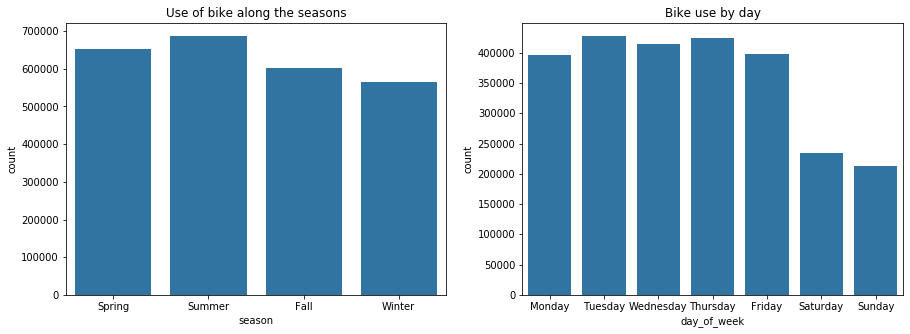

In [9]:
#bar chart for the distribution along the months
plt.figure(figsize = [15, 5])
base_color = sns.color_palette()
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.subplot(1, 2, 1)
sns.countplot(data = df_2019, x='season', order=season_order, color=base_color[0]);
plt.title('Use of bike along the seasons');

plt.subplot(1, 2, 2)
sns.countplot(data = df_2019, x='day_of_week', order=day_order, color=base_color[0]);
plt.title('Bike use by day');

## User type

There are much more subscriber user types, but the customer type, spend in average more time with the bikes.

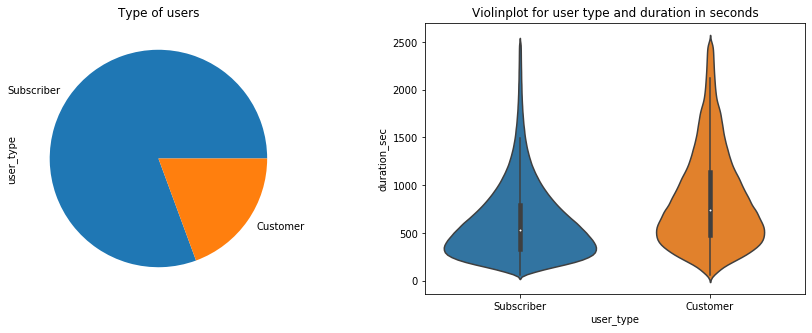

In [10]:
plt.figure(figsize=[15, 5])
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

plt.subplot(1, 2, 1)
df_2019.user_type.value_counts().plot(kind='pie');
plt.title('Type of users');

plt.subplot(1, 2, 2)
duration = df_2019.query('duration_sec <= 2500')
sns.violinplot(data = duration, x = 'user_type', y = 'duration_sec');
plt.title('Violinplot for user type and duration in seconds');

## Multivariable visualization

We saw earlier that there were more users during the weekedays monday to friday, now we can prove that although this is true, the users spent way more time during the weekend than during weekends, and Summer, Spring and Fall are much better seasons than winter.

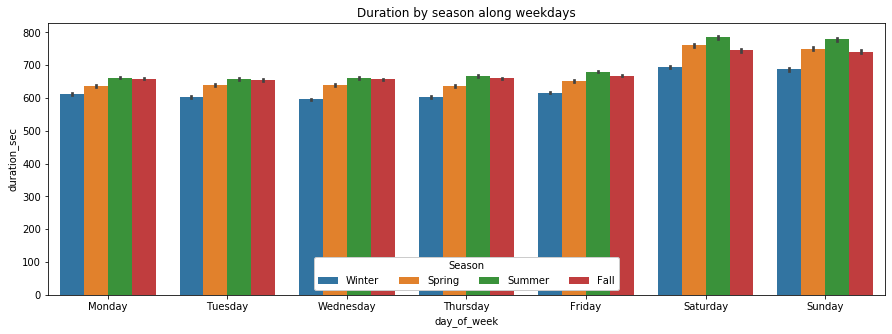

In [11]:
plt.figure(figsize = [15, 5])
ax = sns.barplot(data = duration, x = 'day_of_week', y = 'duration_sec', hue = 'season', order=day_order)
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Season');
plt.title('Duration by season along weekdays');